## Load all the Libraries

In [1]:
import pandas as pd              
import numpy as np               
import matplotlib.pyplot as plt 
import statsmodels.api as sm    
from statsmodels.stats.proportion import proportions_ztest
from sklearn.model_selection import train_test_split  
from sklearn.metrics import roc_auc_score, precision_recall_curve, f1_score, confusion_matrix, classification_report           
from sklearn.preprocessing import StandardScaler 
from matplotlib.colors import LinearSegmentedColormap

import warnings
warnings.filterwarnings('ignore')

## Load and Explore the data

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


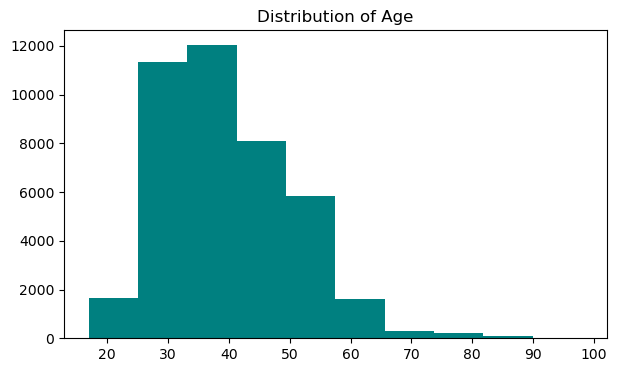

In [7]:
plt.figure(figsize=(7,4))
plt.hist(df['age'], color='teal')
plt.title('Distribution of Age')
plt.show()

In [8]:
df['pdays'].value_counts(normalize=True).sort_index()*100

pdays
0       0.036418
1       0.063125
2       0.148101
3       1.065844
4       0.286491
5       0.111683
6       1.000291
7       0.145673
8       0.043702
9       0.155385
10      0.126250
11      0.067981
12      0.140818
13      0.087404
14      0.048558
15      0.058269
16      0.026707
17      0.019423
18      0.016995
19      0.007284
20      0.002428
21      0.004856
22      0.007284
25      0.002428
26      0.002428
27      0.002428
999    96.321744
Name: proportion, dtype: float64

In [9]:
df["never_contacted"] = (df["pdays"] == 999).astype(int)
# df['pdays'] = df['pdays'].replace(999, -1)

In [10]:
num_cols = df.select_dtypes(include=["number"]).columns.tolist()
cat_cols = df.select_dtypes(exclude=["number"]).columns.tolist()

In [11]:
for col in cat_cols: 
    print(col)
    print(df[col].value_counts())
    print('******************')

job
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
******************
marital
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
******************
education
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
******************
default
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
******************
housing
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64
******************
loan
loan
no     

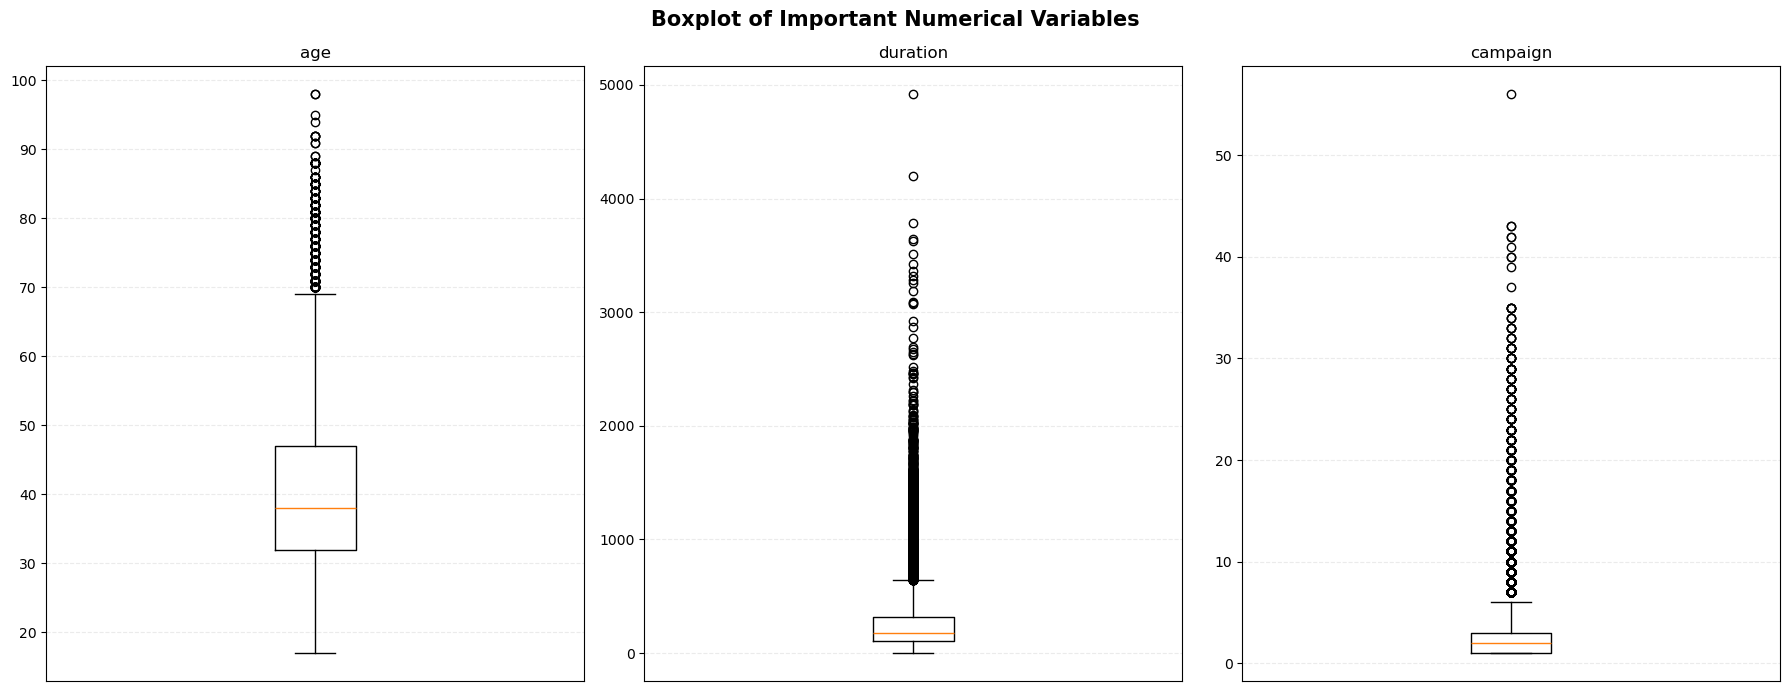

In [12]:
num_vars = ['age', 'duration', 'campaign']

fig, axes = plt.subplots(1, 3, figsize=(18, 7))
axes = axes.ravel()

for i, col in enumerate(num_vars):
    axes[i].boxplot(df[col].dropna(), vert=True, showfliers=True)
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xticks([])
    axes[i].grid(axis='y', linestyle='--', alpha=0.25)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Boxplot of Important Numerical Variables', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()


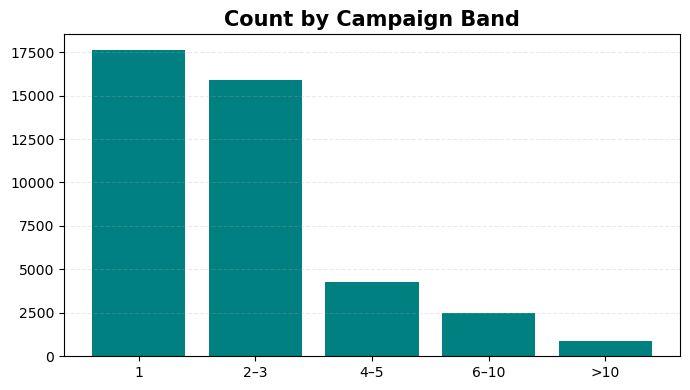

In [13]:
## Number of contact in the current campaign

bins = [0, 1, 3, 5, 10, np.inf]         
labels = ["1","2–3","4–5","6–10",">10"]

df["campaign_band"] = pd.cut(df["campaign"], bins=bins, labels=labels, right=True, ordered=True)
cam_counts = df['campaign_band'].value_counts()

plt.figure(figsize=(7,4))
plt.bar(cam_counts.index, cam_counts.values, color='teal')
plt.title("Count by Campaign Band", fontsize=15, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.25)
plt.tight_layout()
plt.show()


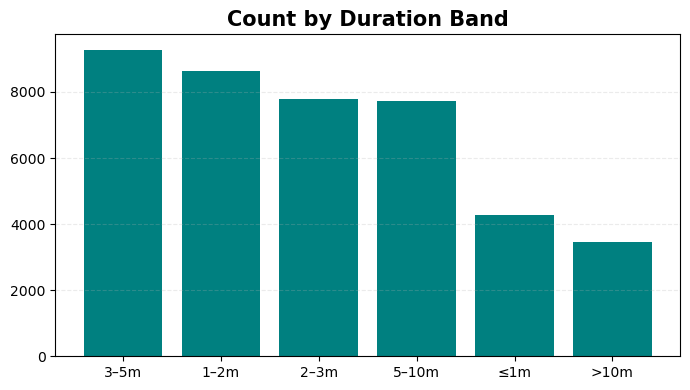

In [14]:
dur_bins = [-np.inf, 60, 120, 180, 300, 600, np.inf] 
dur_labels = ["≤1m","1–2m","2–3m","3–5m","5–10m",">10m"]

df["duration_band"] = pd.cut(df["duration"], bins=dur_bins, labels=dur_labels, right=True, ordered=True)
dur_counts = df['duration_band'].value_counts()

plt.figure(figsize=(7,4))
plt.bar(dur_counts.index, dur_counts.values, color='teal')
plt.title("Count by Duration Band", fontsize=15, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.25)
plt.tight_layout()
plt.show()


In [15]:
df['subscribed'] = (df['y'].astype(str).str.lower() == 'yes').astype(int)

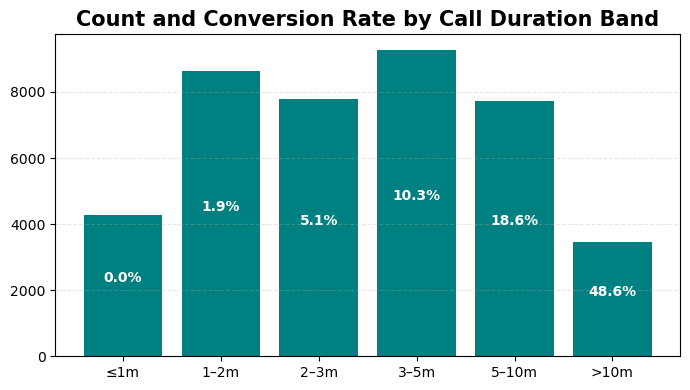

In [16]:
dur_bins = [-np.inf, 60, 120, 180, 300, 600, np.inf] 
dur_labels = ["≤1m","1–2m","2–3m","3–5m","5–10m",">10m"]

df["duration_band"] = pd.cut(df["duration"], bins=dur_bins, labels=dur_labels, right=True, ordered=True)
dur_stats = (df.groupby("duration_band").agg(users=("duration", "size"), conversions=("subscribed", "sum")).reset_index())

dur_stats["conv_rate"] = 100 * dur_stats["conversions"] / dur_stats["users"]

plt.figure(figsize=(7,4))
bars = plt.bar(dur_stats["duration_band"], dur_stats["users"], color='teal')

for bar, rate, conv, total in zip(bars, dur_stats["conv_rate"], dur_stats["conversions"], dur_stats["users"]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height/2,
             f"{rate:.1f}%",
             ha='center', va='bottom', fontsize=10, color='white', fontweight='bold')

plt.title("Count and Conversion Rate by Call Duration Band", fontsize=15, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [17]:
num_cols = df.select_dtypes(include=["number"]).columns.tolist()


In [18]:
num_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'never_contacted',
 'subscribed']

In [19]:
df[num_cols].corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,never_contacted,subscribed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,-0.034292,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,-0.047634,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,0.052569,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,0.999992,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,-0.587462,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,0.270945,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,0.078715,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,-0.091254,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,0.296920,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,0.372682,-0.354678


In [20]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'never_contacted',
       'campaign_band', 'duration_band', 'subscribed'],
      dtype='object')

In [21]:
df1 = df.copy()

In [22]:
df = df.drop(['duration', 'campaign_band',
       'duration_band', 'y' ], axis=1)

## Q1
First, use macroeconomic indicators (consumer confidence, March Eurozone interest rates, etc.) to perform an "economic adjustment," clarifying how overall customer willingness changes in the three phases of contraction, recovery, and neutrality, guiding the annual campaign schedule and budget.


In [23]:
cols = ['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df[cols]), columns=cols)

In [24]:
df['econ_score'] = (
    - df_std['emp.var.rate'] 
    - df_std['cons.price.idx'] 
    - df_std['cons.conf.idx']
    + df_std['euribor3m']
    - df_std['nr.employed']
)

In [25]:
low  = df['econ_score'].quantile(0.33)
high = df['econ_score'].quantile(0.67)

def phase(x):
    if x <= low:
        return 'recovery'     
    elif x >= high:
        return 'contraction'   
    else:
        return 'neutral'

df['econ_phase'] = df['econ_score'].apply(phase)

In [26]:
phase_summary = (df.groupby('econ_phase')['subscribed']
                   .agg(rate='mean', n='size')
                   .reset_index()
                   .sort_values('rate', ascending=False))
phase_summary['rate_pct'] = (100*phase_summary['rate']).round(1)
print("\n=== Economic Adjustment: phase conversion ===\n", phase_summary)



=== Economic Adjustment: phase conversion ===
     econ_phase      rate      n  rate_pct
0  contraction  0.184647  14108      18.5
1      neutral  0.115867  13481      11.6
2     recovery  0.034782  13599       3.5


- Contraction: weak economy → people feel uncertain and prefer saving.
- Neutral: average or stable economic conditions.
- Recovery: improving economy → people feel confident and spend more.

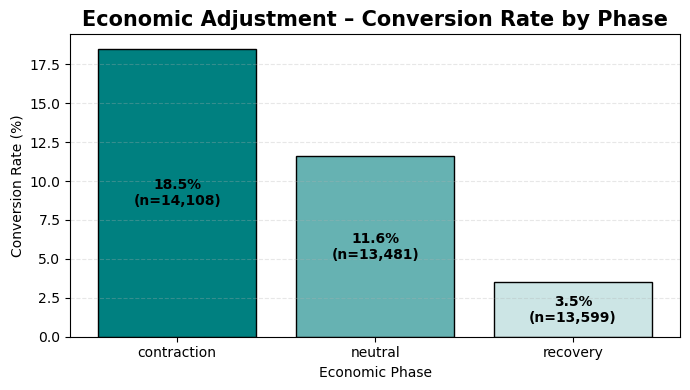

In [27]:
plt.figure(figsize=(7,4))

bars = plt.bar(phase_summary["econ_phase"],
               phase_summary["rate_pct"],
               color=['#008080','#66b2b2','#cce5e5'],   
               edgecolor='black')

for bar, pct, n in zip(bars, phase_summary["rate_pct"], phase_summary["n"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2-1,
             f"{pct:.1f}%\n(n={n:,})",
             ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.title("Economic Adjustment – Conversion Rate by Phase", fontsize=15, fontweight='bold')
plt.xlabel("Economic Phase")
plt.ylabel("Conversion Rate (%)")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [28]:
phase_counts = df.groupby('econ_phase')['subscribed'].agg(['sum','count'])
print(phase_counts)

count = np.array([phase_counts.loc['contraction','sum'],
                  phase_counts.loc['recovery','sum']])

nobs = np.array([phase_counts.loc['contraction','count'],
                 phase_counts.loc['recovery','count']])

stat, pval = proportions_ztest(count, nobs)
print(f"\nZ = {stat:.3f}, p-value = {pval:.5f}")

if pval < 0.05:
    print("Significant difference between contraction and recovery.")
else:
    print("No significant difference.")


              sum  count
econ_phase              
contraction  2605  14108
neutral      1562  13481
recovery      473  13599

Z = 39.685, p-value = 0.00000
Significant difference between contraction and recovery.


Since the p-value < 0.05, the difference is statistically significant.
This means customers were much more likely to subscribe during contractions than during recoveries.

There is strong statistical evidence that economic conditions influence saving behaviour.
The contraction phase yields the highest conversion rate (≈ 18 %), while the recovery phase shows the lowest (≈ 3 %).
This suggests that the bank should allocate more marketing budget and campaign effort during contraction periods, when customers are naturally more receptive to saving offers.

## Question 2 – Marketing Mix within Each Economic Phase
### Objective
The purpose of this section is to find the best marketing strategy for each economic phase identified in Question 1.

Specifically, we compare:
1. Which contact channel performs better (cellular vs telephone),
2. How the number of calls influences success, and
3. How the time since last contact (pdays) affects conversion.

In [29]:
phase_channel = (df.groupby(['econ_phase','contact'])['subscribed']
                   .agg(rate='mean', n='size')
                   .reset_index()
                   .sort_values(['econ_phase','rate'], ascending=[True, False]))
phase_channel['rate_pct'] = (100*phase_channel['rate']).round(1)
print("\n=== Best channel within each phase ===\n", phase_channel)



=== Best channel within each phase ===
     econ_phase    contact      rate      n  rate_pct
0  contraction   cellular  0.188332  12839      18.8
1  contraction  telephone  0.147360   1269      14.7
2      neutral   cellular  0.116906  11907      11.7
3      neutral  telephone  0.108005   1574      10.8
5     recovery  telephone  0.035243  12201       3.5
4     recovery   cellular  0.030758   1398       3.1


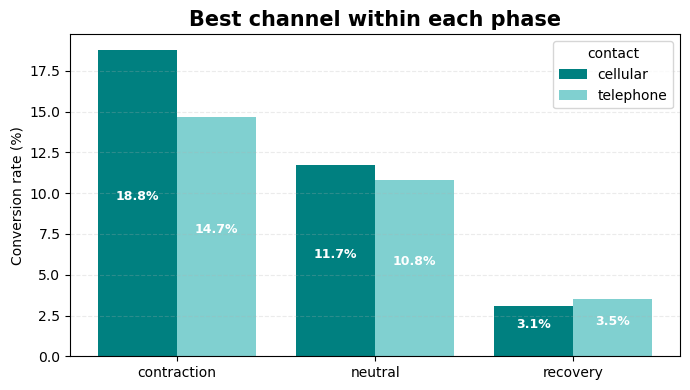

In [30]:
phase_order = ['contraction','neutral','recovery']
channels = sorted(phase_channel['contact'].unique())

fig, ax = plt.subplots(figsize=(7,4))
width = 0.4
x = np.arange(len(phase_order))

col = ['teal', '#80d0d0']

for i, ch in enumerate(channels):
    sub = (phase_channel[phase_channel['contact'] == ch]
           .set_index('econ_phase').reindex(phase_order))
    ax.bar(x + i*width - (width*(len(channels)-1)/2),
           sub['rate_pct'].values, width, label=ch, color=col[i])

for i, ch in enumerate(channels):
    sub = (phase_channel[phase_channel['contact'] == ch].set_index('econ_phase').reindex(phase_order))
    yvals = sub['rate_pct'].values
    nvals = sub['n'].values
    xpos = x + i*width - (width*(len(channels)-1)/2)
    for xv, yv, nv in zip(xpos, yvals, nvals):
        if np.isfinite(yv):
            ax.text(xv, yv/2, f"{yv:.1f}%",
                    ha='center', va='bottom', fontsize=9, color='white', fontweight='bold')

ax.set_xticks(x)
ax.set_xticklabels(phase_order)
ax.set_ylabel("Conversion rate (%)")
ax.set_title("Best channel within each phase", fontweight='bold', fontsize=15)
ax.legend(title="contact")
ax.grid(axis='y', linestyle='--', alpha=0.25)
plt.tight_layout()
plt.show()


#### This bar chart compares the average conversion rate (%) of each contact channel in every economic phase.

- In the contraction phase, both channels perform well, but cellular contact (18.8 %) clearly outperforms telephone (14.7 %).
- In the neutral phase, cellular remains slightly better (11.7 %) than telephone (10.8 %).
- During recovery, both channels drop sharply (< 4 %).

Cellular communication consistently yields higher subscription rates across all phases, and it becomes especially effective when the economy contracts. 

In [31]:
phase_freq = (df.groupby(['econ_phase','campaign'])['subscribed']
                .agg(rate='mean', n='size')
                .reset_index()
                .sort_values(['econ_phase','campaign']))
phase_freq['rate_pct'] = (100*phase_freq['rate']).round(1)
print("\n=== Conversion vs number of calls within each phase ===\n", phase_freq.head(20))



=== Conversion vs number of calls within each phase ===
      econ_phase  campaign      rate     n  rate_pct
0   contraction         1  0.200171  7029      20.0
1   contraction         2  0.181746  3780      18.2
2   contraction         3  0.190602  1511      19.1
3   contraction         4  0.168956   728      16.9
4   contraction         5  0.115974   457      11.6
5   contraction         6  0.076628   261       7.7
6   contraction         7  0.105634   142      10.6
7   contraction         8  0.055556    90       5.6
8   contraction         9  0.026316    38       2.6
9   contraction        10  0.136364    22      13.6
10  contraction        11  0.050000    20       5.0
11  contraction        12  0.000000    14       0.0
12  contraction        13  0.166667     6      16.7
13  contraction        14  0.000000     1       0.0
14  contraction        15  0.000000     4       0.0
15  contraction        16  0.000000     1       0.0
16  contraction        17  1.000000     1     100.0
17  co

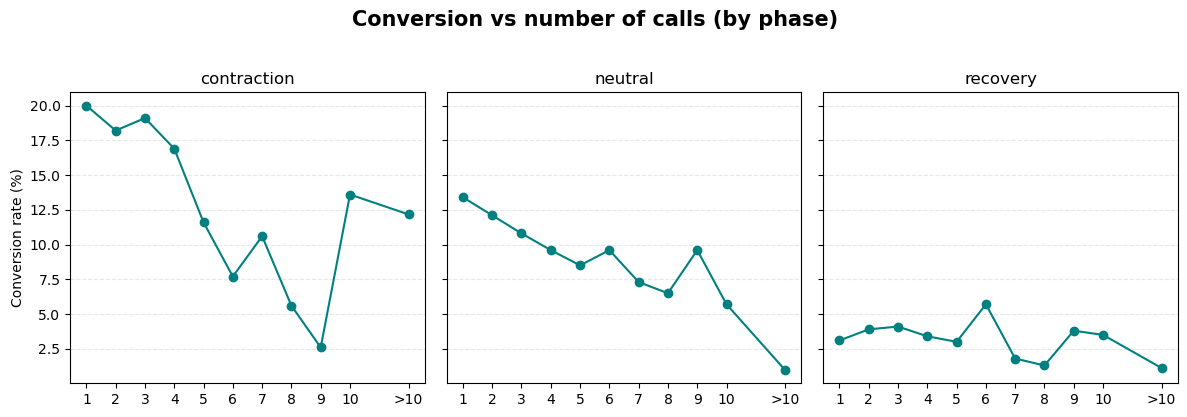

In [32]:
pf = phase_freq.copy()

pf['campaign_plot'] = pf['campaign'].where(pf['campaign'] <= 10, 11)

pf_plot = (pf.groupby(['econ_phase','campaign_plot'])
             .agg(rate_pct=('rate_pct','mean'), n=('n','sum'))
             .reset_index())

phase_order = ['contraction','neutral','recovery']
fig, axes = plt.subplots(1, 3, figsize=(12,4), sharey=True)

for ax, ph in zip(axes, phase_order):
    sub = pf_plot[pf_plot['econ_phase']==ph].sort_values('campaign_plot')
    x = sub['campaign_plot'].replace({11:12})
    ax.plot(x, sub['rate_pct'], marker='o', color='teal')
    ax.set_title(ph)
    #ax.set_xlabel("# calls (campaign)")
    ax.grid(axis='y', linestyle='--', alpha=0.3)
    ax.set_xticks(list(range(1,11)) + [12])
    ax.set_xticklabels([*range(1,11), '>10'])

axes[0].set_ylabel("Conversion rate (%)")
fig.suptitle("Conversion vs number of calls (by phase)", y=1.03, fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()


#### This line chart shows how conversion rate changes as customers receive more calls in the same campaign.

Conversion is highest for the first 1–3 calls and then declines steadily.

- In the contraction phase, conversion drops from ~20 % on the first call to below 10 % after five calls.
- Similar declining trends appear in the neutral and recovery phases, with recovery remaining flat and low overall.


There is clear evidence of diminishing returns. Additional calls after the third attempt provide little or no gain and can even reduce efficiency. Campaigns should therefore cap at three calls per customer to balance effort and return.

In [59]:

bins = [0, 1, 2, 4, 6, 11, 999, np.inf]
labels = ['0', '1', '2–3', '4–5', '6–10', '10+', 'never']

df['pdays_bin'] = pd.cut(df['pdays'], bins=bins, labels=labels, include_lowest=True, right=False)

phase_intervals = (
    df.groupby(['econ_phase', 'pdays_bin'])['subscribed']
      .agg(rate='mean', n='size')
      .reset_index()
)

phase_intervals['rate_pct'] = (100 * phase_intervals['rate']).round(1)

print("Conversion vs pdays bins within each phase\n")
print(phase_intervals)



Conversion vs pdays bins within each phase

     econ_phase pdays_bin      rate      n  rate_pct
0   contraction         0  0.500000      6      50.0
1   contraction         1  0.291667     24      29.2
2   contraction       2–3  0.647815    389      64.8
3   contraction       4–5  0.534351    131      53.4
4   contraction      6–10  0.588235    323      58.8
5   contraction       10+  0.452174    115      45.2
6   contraction     never  0.154802  13120      15.5
7       neutral         0  0.777778      9      77.8
8       neutral         1  0.500000      2      50.0
9       neutral       2–3  0.747748    111      74.8
10      neutral       4–5  0.666667     33      66.7
11      neutral      6–10  0.763251    283      76.3
12      neutral       10+  0.719101     89      71.9
13      neutral     never  0.090242  12954       9.0
14     recovery         0       NaN      0       NaN
15     recovery         1       NaN      0       NaN
16     recovery       2–3       NaN      0       NaN
17

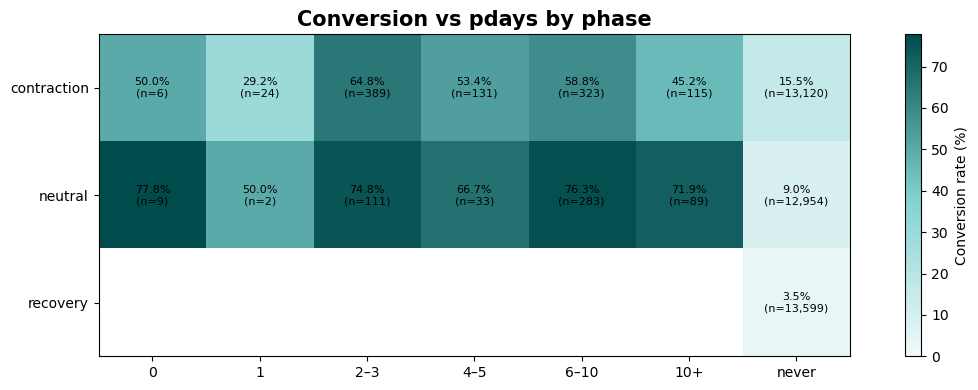

In [60]:


bins_order  = labels
phase_order = ['contraction','neutral','recovery']

rate_tab = (phase_intervals
            .pivot(index='econ_phase', columns='pdays_bin', values='rate_pct')
            .reindex(index=phase_order, columns=bins_order))

n_tab = (phase_intervals
         .pivot(index='econ_phase', columns='pdays_bin', values='n')
         .reindex(index=phase_order, columns=bins_order))

teal_cmap = LinearSegmentedColormap.from_list('teal_div', ["#f2fafa", "#80d0d0", "#004c4c"])
fig, ax = plt.subplots(figsize=(12, 4))
vmax = np.nanmax(rate_tab.values) if np.isfinite(np.nanmax(rate_tab.values)) else 0
im = ax.imshow(rate_tab.values, vmin=0, vmax=vmax, cmap=teal_cmap)

ax.set_xticks(range(len(bins_order)))
ax.set_xticklabels(bins_order)

ax.set_yticks(range(len(phase_order))) 
ax.set_yticklabels(phase_order)


for i in range(rate_tab.shape[0]):
    for j in range(rate_tab.shape[1]):
        rv = rate_tab.iloc[i, j]
        nv = n_tab.iloc[i, j]
        if pd.notna(rv) and pd.notna(nv) and nv > 0:
            ax.text(j, i, f"{rv:.1f}%\n(n={int(nv):,})",
                    ha='center', va='center', fontsize=8, color='black')


ax.set_title("Conversion vs pdays by phase", fontsize=15, fontweight='bold')
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Conversion rate (%)")
plt.tight_layout()
plt.show()


#### This heatmap analyses conversion rates by days since previous contact for each economic phase.

- During contraction, conversion is highest when the re-contact window is short (2–10 days), reaching 50–65 %, then drops for longer gaps.
- The neutral phase shows a similar pattern—fast follow-ups within 10 days produce 70 % + success.
- In recovery, conversion is consistently low across all intervals (< 5 %), regardless of timing.

Re-engaging customers quickly (after the previous contact) yields the best results, especially in contraction and neutral periods.
If more than a month (> 10 days) passes, the lead becomes “cold,” and the chance of conversion falls sharply. The ideal re-contact schedule is therefore within 10 days.

# Q3
Third, apply these insights to potential customer ranking and resource allocation: train a propensity model, generate a daily outbound call list according to the budget, and use top-decile lift and revenue curves to demonstrate the gains compared to random calling.


In [35]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'never_contacted', 'subscribed',
       'econ_score', 'econ_phase', 'pdays_bin'],
      dtype='object')

In [36]:
feature_cols = ['age','loan','housing', 'job', 'marital', 
                'education', 'month', 'day_of_week',
                'contact','campaign','poutcome','previous','pdays',
                'econ_phase']  

In [37]:
X = pd.get_dummies(df[feature_cols], drop_first=True)
X= X.astype(float)
y = df['subscribed'].copy()


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)

In [39]:
X_train_sm = sm.add_constant(X_train, has_constant='add')
X_test_sm  = sm.add_constant(X_test,  has_constant='add')
logit = sm.Logit(y_train, X_train_sm).fit(disp=False)

In [40]:
p_train = logit.predict(X_train_sm)
p_test  = logit.predict(X_test_sm)

In [41]:
auc = roc_auc_score(y_test, p_test)
print(f"=== Propensity model ===\nTest ROC-AUC: {auc:.3f}")

=== Propensity model ===
Test ROC-AUC: 0.774


In [42]:
scored = pd.DataFrame({'y': y_test.values, 'p': p_test}, index=y_test.index).sort_values('p', ascending=False)
n = len(scored)


In [43]:
scored['decile'] = np.minimum(np.floor(np.arange(n) / (n/10)) + 1, 10).astype(int)

base_rate = scored['y'].mean() 
lift_tbl = (scored.groupby('decile')
                   .agg(avg_score=('p','mean'), conv=('y','mean'), n=('y','size'))
                   .reset_index())

lift_tbl['lift_vs_random'] = lift_tbl['conv'] / base_rate
print("\n=== Lift table (deciles) ===\n", lift_tbl)



=== Lift table (deciles) ===
    decile  avg_score      conv     n  lift_vs_random
0       1   0.435641  0.466019  2060        4.136726
1       2   0.163282  0.172414  2059        1.530470
2       3   0.112392  0.102913  2060        0.913527
3       4   0.097038  0.094706  2059        0.840681
4       5   0.084699  0.076736  2059        0.681167
5       6   0.073358  0.061165  2060        0.542945
6       7   0.060296  0.054395  2059        0.482852
7       8   0.042708  0.040777  2060        0.361964
8       9   0.026823  0.029140  2059        0.258671
9      10   0.018823  0.028169  2059        0.250049


In [44]:
DAILY_CALL_BUDGET = 500
call_list = scored.head(DAILY_CALL_BUDGET).copy()
call_list['rank'] = np.arange(1, len(call_list)+1)
print(f"\nTop {DAILY_CALL_BUDGET} prospects (head):\n", call_list.head())


Top 500 prospects (head):
        y         p  decile  rank
39261  1  0.942114       1     1
39348  1  0.941650       1     2
38967  1  0.939765       1     3
39180  0  0.936295       1     4
39325  1  0.932109       1     5


In [45]:
VALUE_PER_SUB = 60.0
COST_PER_CALL = 1.50

scored['cum_calls'] = np.arange(1, n+1)
scored['cum_conversions'] = scored['y'].cumsum()
scored['cum_revenue'] = VALUE_PER_SUB * scored['cum_conversions'] - COST_PER_CALL * scored['cum_calls']


In [46]:
scored

,y,p,decile,cum_calls,cum_conversions,cum_revenue
39261,1,0.942114,1,1,1,58.5
39348,1,0.941650,1,2,2,117.0
38967,1,0.939765,1,3,3,175.5
39180,0,0.936295,1,4,3,174.0
39325,1,0.932109,1,5,4,232.5
...,...,...,...,...,...,...
4650,0,0.003211,10,20590,2320,108315.0
5564,0,0.002622,10,20591,2320,108313.5
5304,0,0.002452,10,20592,2320,108312.0
4139,0,0.001784,10,20593,2320,108310.5


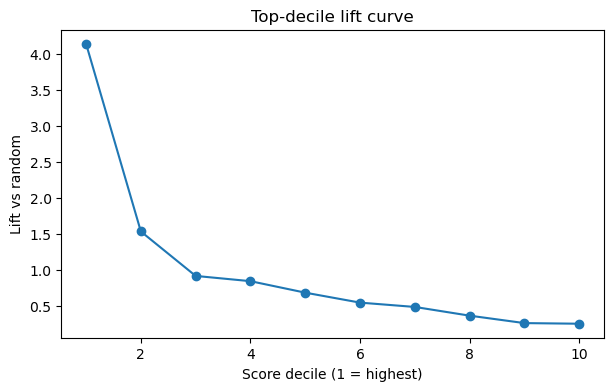

In [47]:
plt.figure(figsize=(7,4))
plt.plot(lift_tbl['decile'], lift_tbl['lift_vs_random'], marker='o')
plt.xlabel('Score decile (1 = highest)')
plt.ylabel('Lift vs random')
plt.title('Top-decile lift curve')
plt.show()


The top-decile lift curve shows how much better the model performs compared to random calling — the first decile (top 10 % of customers) converts about four times higher than average, and the curve quickly drops afterward.

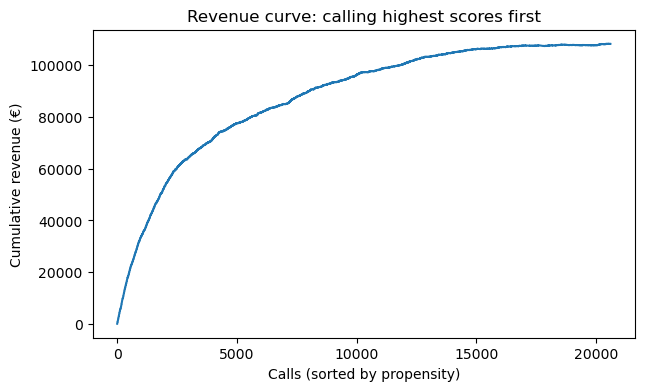

In [48]:
plt.figure(figsize=(7,4))
plt.plot(scored['cum_calls'], scored['cum_revenue'])
plt.xlabel('Calls (sorted by propensity)')
plt.ylabel('Cumulative revenue (€)')
plt.title('Revenue curve: calling highest scores first')
plt.show()


The revenue curve shows how total profit increases as we call customers in descending order of their predicted probability — revenue grows fastest for the top-scored leads and then flattens, confirming that prioritising high-propensity customers yields the highest returns early on.

In [49]:
coef_df = pd.DataFrame({
    'feature': logit.params.index,
    'coef': logit.params.values,
    'se': logit.bse.values,
    'pval': logit.pvalues.values
})

In [50]:
coef_df = coef_df[coef_df['feature'] != 'const']
coef_df['abs_coef'] = coef_df['coef'].abs()
coef_df = coef_df.sort_values('abs_coef', ascending=False)
coef_df

,feature,coef,se,pval,abs_coef
47,econ_phase_recovery,-1.338133,0.104025,7.220720e-38,1.338133
34,month_mar,1.241749,0.154305,8.460800e-16,1.241749
22,marital_unknown,1.025955,0.417869,1.408043e-02,1.025955
36,month_nov,-0.920720,0.107694,1.237277e-17,0.920720
31,month_dec,0.850502,0.233560,2.710777e-04,0.850502
35,month_may,-0.698297,0.091184,1.886333e-14,0.698297
30,month_aug,-0.615011,0.111527,3.498390e-08,0.615011
32,month_jul,-0.610652,0.117785,2.166168e-07,0.610652
13,job_retired,0.606121,0.125654,1.408967e-06,0.606121
37,month_oct,0.595252,0.140826,2.369668e-05,0.595252


In [51]:
coef_df['significant'] = coef_df['pval'] < 0.05  
TOP_N = 20
top = coef_df.head(TOP_N)

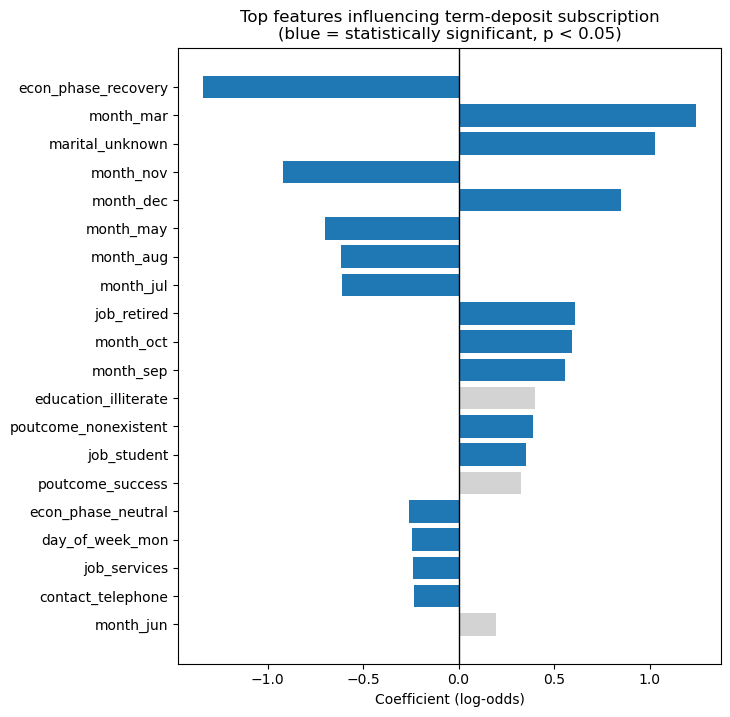

In [52]:

plt.figure(figsize=(7,8))
bars = plt.barh(top['feature'], top['coef'], 
                color=np.where(top['significant'], '#1f77b4', 'lightgrey'))

plt.axvline(0, color='black', lw=1)
plt.xlabel('Coefficient (log-odds)')
plt.title('Top features influencing term-deposit subscription\n(blue = statistically significant, p < 0.05)')
plt.gca().invert_yaxis()  
plt.show()


In [53]:
coef_df

,feature,coef,se,pval,abs_coef,significant
47,econ_phase_recovery,-1.338133,0.104025,7.220720e-38,1.338133,True
34,month_mar,1.241749,0.154305,8.460800e-16,1.241749,True
22,marital_unknown,1.025955,0.417869,1.408043e-02,1.025955,True
36,month_nov,-0.920720,0.107694,1.237277e-17,0.920720,True
31,month_dec,0.850502,0.233560,2.710777e-04,0.850502,True
35,month_may,-0.698297,0.091184,1.886333e-14,0.698297,True
30,month_aug,-0.615011,0.111527,3.498390e-08,0.615011,True
32,month_jul,-0.610652,0.117785,2.166168e-07,0.610652,True
13,job_retired,0.606121,0.125654,1.408967e-06,0.606121,True
37,month_oct,0.595252,0.140826,2.369668e-05,0.595252,True


In [54]:
signif_feats = coef_df[coef_df['significant'] == True]['feature'].values
print("Number of significant features:", len(signif_feats))
print("Examples:", signif_feats[:10])


Number of significant features: 21
Examples: ['econ_phase_recovery' 'month_mar' 'marital_unknown' 'month_nov'
 'month_dec' 'month_may' 'month_aug' 'month_jul' 'job_retired' 'month_oct']


In [55]:
X_sig = X[signif_feats]

X_train, X_test, y_train, y_test = train_test_split(
    X_sig, y, test_size=0.5, stratify=y, random_state=42
)

X_train_sm = sm.add_constant(X_train, has_constant='add')
X_test_sm  = sm.add_constant(X_test,  has_constant='add')
logit_sig = sm.Logit(y_train, X_train_sm).fit(disp=False)

p_test_sig = logit_sig.predict(X_test_sm)
auc_sig = roc_auc_score(y_test, p_test_sig)
print(f"\nAUC (significant-only model): {auc_sig:.3f}")



AUC (significant-only model): 0.773


In [56]:
prec, rec, thr = precision_recall_curve(y_test, p_test_sig)

In [57]:
f1 = 2 * (prec * rec) / (prec + rec + 1e-9)
best_idx = f1.argmax()

print(f"Best F1 threshold ≈ {thr[best_idx]:.2f}")
print(f"Precision={prec[best_idx]:.3f}, Recall={rec[best_idx]:.3f}, F1={f1[best_idx]:.3f}")

Best F1 threshold ≈ 0.20
Precision=0.435, Recall=0.437, F1=0.436


In [58]:
threshold = 0.2
y_pred = (p_test_sig >= threshold).astype(int)

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index=['Actual: No', 'Actual: Yes'],
                     columns=['Predicted: No', 'Predicted: Yes'])
print(f"\n=== Confusion Matrix (threshold={threshold}) ===\n")
print(cm_df)

print("\n=== Classification Report ===\n")
print(classification_report(y_test, y_pred, digits=3))



=== Confusion Matrix (threshold=0.2) ===

             Predicted: No  Predicted: Yes
Actual: No           16927            1347
Actual: Yes           1299            1021

=== Classification Report ===

              precision    recall  f1-score   support

           0      0.929     0.926     0.928     18274
           1      0.431     0.440     0.436      2320

    accuracy                          0.872     20594
   macro avg      0.680     0.683     0.682     20594
weighted avg      0.873     0.872     0.872     20594

